
Chargement des bibliothèques 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Chargement du fichier csv

In [74]:
df = pd.read_csv("data/G44 MDSC.csv", delimiter=";") #les colonnes sont délimités par des ;
df = df.iloc[:, 4:-1]

Aperçu des données

In [75]:
print(df.head())
print(df.info()) #vérifier les types des données et les valeurs manquantes
print(df.describe()) #stats des var numériques

  CD11b FITC    LIN PE CD33 PCP55   CD14 PC7  CD34 APC CD15 EF450 HLA DR V510
0   179,3277  256,1841    34,5249    46,8371  600,3826   357,4225     957,228
1    18591,4  2218,096   19449,65   30413,01  73,00342   -134,701    9349,126
2   10163,01  1626,624   5728,909   14343,58  612,8617   4942,918    911,1422
3   132,6821  187,6815   334,1617   97,55116  430,8043   150,7871    145,5419
4   3173,043  1916,426   1281,217  -3,500641  1025,849   5722,956    846,8151
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838049 entries, 0 to 1838048
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   CD11b FITC   object
 1   LIN PE       object
 2   CD33 PCP55   object
 3   CD14 PC7     object
 4   CD34 APC     object
 5   CD15 EF450   object
 6   HLA DR V510  object
dtypes: object(7)
memory usage: 98.2+ MB
None
       CD11b FITC    LIN PE CD33 PCP55  CD14 PC7  CD34 APC CD15 EF450  \
count     1838049   1838049    1838049   1838049   1838049    1838049   
uni

Vérifier les valeurs manquantes

In [76]:
print(df.isnull().sum())

CD11b FITC     0
LIN PE         0
CD33 PCP55     0
CD14 PC7       0
CD34 APC       0
CD15 EF450     0
HLA DR V510    0
dtype: int64


3. Afficher les valeurs de marqueurs.

Le code suivant permet d'afficher les valeurs d'expression pour chaque marqueur, rangées par les moyennes.

<Axes: ylabel='Expression'>

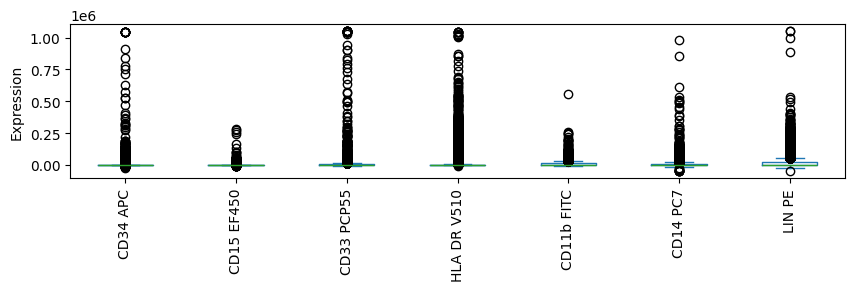

In [77]:
df = df.replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce') #pandas ne comprend pas les virgules
sort_by_mean = df.mean().sort_values(ascending=True)
df[sort_by_mean.index].plot(kind='box', figsize=(10, 2), rot=90, ylabel='Expression')

 4. Appliquer une normalisation centrée-réduite aux données

La normalisation (standardisation) centrée-réduite consiste à soustraire la moyenne et à diviser par l'écart-type les valeurs d'expression. On peut la réaliser avec l’objet StandardScaler de la librairie scikit-learn.

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciation de l'objet scaler
df_scaled = scaler.fit_transform(df)  # Normalisation centrée-réduite
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)  # Conversion en DataFrame pandas

Les valeurs d'expression sont ramenées à la même échelle après une normalisation centrée-réduite. La moyenne d’expression de chaque gène est égale à 0 et l'écart type est égal à 1.

<Axes: ylabel='Expression'>

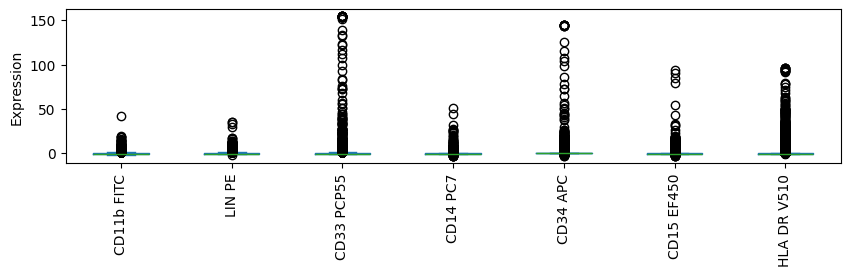

In [79]:
df_scaled.plot(kind='box', figsize=(10, 2), rot=90, ylabel='Expression')

In [80]:
import numpy as np

# Calcul des quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Intervalle interquartile

# Détection des outliers (en dehors de [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Extraire les lignes contenant des outliers
outlier_rows = df[outliers.any(axis=1)]
np.shape(outlier_rows)
outlier_rows  # Afficher les lignes avec des outliers

,CD11b FITC,LIN PE,CD33 PCP55,CD14 PC7,CD34 APC,CD15 EF450,HLA DR V510
1,18591.4000,2218.0960,19449.6500,30413.010000,73.00342,-134.70100,9349.1260
2,10163.0100,1626.6240,5728.9090,14343.580000,612.86170,4942.91800,911.1422
4,3173.0430,1916.4260,1281.2170,-3.500641,1025.84900,5722.95600,846.8151
5,29339.3500,303.7053,2339.5700,19228.960000,-413.09020,310.43320,4013.0670
6,893.5752,82289.6500,444.3199,-470.281200,340.10920,332.47250,163.6422
...,...,...,...,...,...,...,...
1838041,3044.0510,469.6032,1261.2030,190.568600,684.59360,5928.03700,238.4018
1838043,13573.3500,197.5844,16400.6600,41458.130000,-1266.78200,-94.01144,10630.5200
1838044,31619.9400,-389.4425,3702.9210,14553.820000,234.63090,2324.49300,701.6781
1838045,18733.1300,445.8633,7902.7550,32708.480000,-217.92980,1300.41300,1662.4920


5. Faire une analyse en composantes principales (ACP)

Le calcul de l'ACP peut se faire à l'aide de l'objet PCA de scikit-learn.

In [81]:
from sklearn.decomposition import PCA

5.1 Calcul de l'ACP

Pour calculer une ACP, on utilise les données standardisées X_scaled.

In [82]:
pca = PCA() # instanciation de l'objet pca
df_pca = pca.fit_transform(df_scaled) # réalisation de l'ACP sur les données X_scaled

Il est plus pratique de convertir le résultat de l'ACP X_pca en dataframe pandas, en précisant les noms de colonnes : de PC1 à PC50.

In [83]:
# Conversion en dataframe pandas
pca_columns = ['PC' + str(c) for c in range(1, df_pca.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC13
df_pca = pd.DataFrame(df_pca, index=df.index, columns=pca_columns) # création du dataframe
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.805450,0.187160,0.008175,-0.298384,-0.780958,0.097624,0.040541
1,2.508696,-0.309599,0.205908,-0.012366,0.016440,1.269063,0.050693
2,0.369757,1.188304,-0.186941,0.370736,0.338261,0.084593,0.192718
3,-0.789904,0.172502,-0.015466,-0.392906,-0.790536,0.149904,0.038815
4,-0.719276,1.381350,-0.182820,0.635274,0.156565,-0.005473,0.060032


5.2 Calcul de la variance expliquée

Les valeurs de la variance expliquée par composante sont disponibles dans l’attribut pca.explained_variance_ratio_ après le calcul de l'ACP.

In [84]:
pca.explained_variance_ratio_

array([0.38433283, 0.17148688, 0.14364445, 0.12812514, 0.10388469,
       0.0509176 , 0.01760842])

On peut les convertir en objet Series de pandas et présenter les valeurs en pourcentage.

In [85]:
explained_variance = pd.Series(dict(zip(df_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

PC1    38.433283
PC2    17.148688
PC3    14.364445
PC4    12.812514
PC5    10.388469
dtype: float64


<Axes: ylabel='Explained variance'>

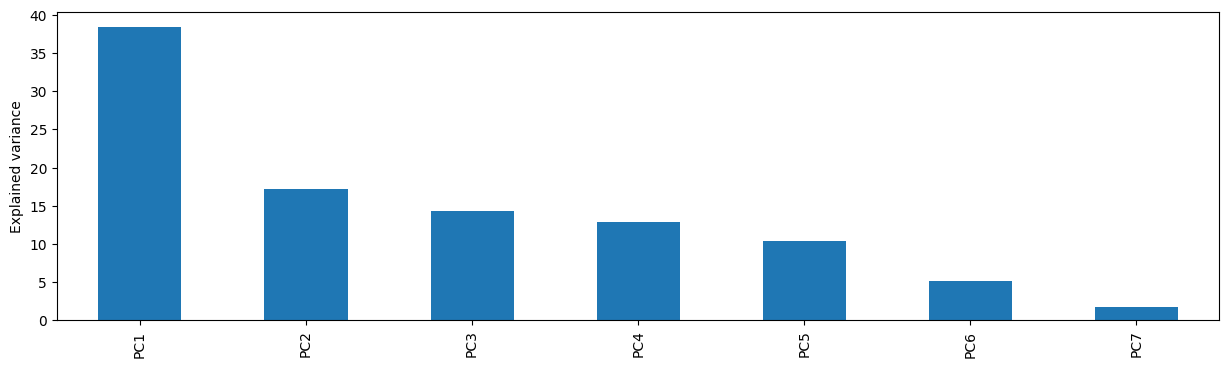

In [86]:
explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Explained variance')

In [87]:
explained_variance['PC1'] + explained_variance['PC2']

np.float64(55.58197025305006)

Les deux premières composantes de l'ACP expliquent 47.8% de la variance.

In [88]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']

np.float64(69.9464148706129)

Les trois premières composantes de l'ACP expliquent 57.5% de la variance.

5.3 Visualisation des deux premières composantes principales de l’ACP

<Axes: xlabel='PC1', ylabel='PC2'>

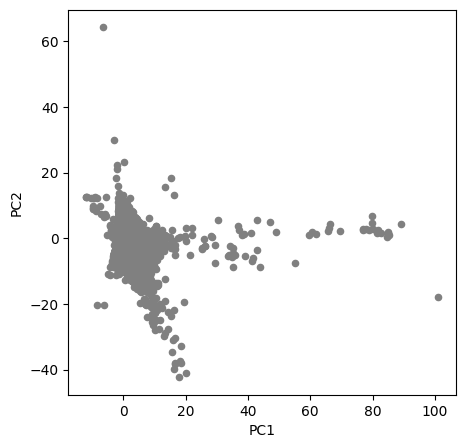

In [89]:
df_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color='gray')

5.4 Visualisation des trois premières composantes principales de l’ACP

Pour créer une image en 3D, on utilisera la librairie standard matplotlib de Python.

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

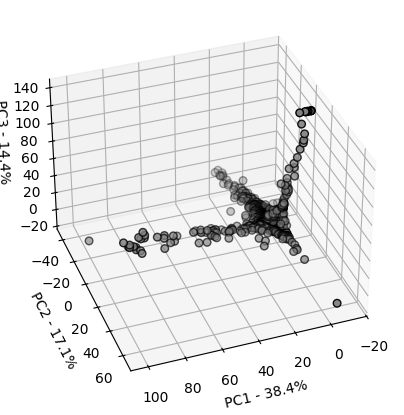

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], marker='o', s=30, edgecolor='k', color='gray')
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=35, azim=70)

6. Visualiser les données avec la méthode t-SNE

La méthode t-SNE (t-distributed stochastic neighbor embedding) fait partie de la librairie scikit-learn.




In [92]:
from sklearn.manifold import TSNE

6.1 Projection 2D

In [93]:
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
df_tsne = tsne.fit_transform(df_scaled)

In [94]:
columns = ['DIM' + str(c) for c in range(1, df_tsne.shape[1]+1, 1)]
df_tsne = pd.DataFrame(df_tsne, index=df.index, columns=columns)
df_tsne.head()

,DIM1,DIM2
0,-55.694458,39.351994
1,72.526031,-41.239456
2,59.800697,70.536415
3,-40.302116,-14.334700
4,-20.423681,74.458481


<Axes: xlabel='DIM1', ylabel='DIM2'>

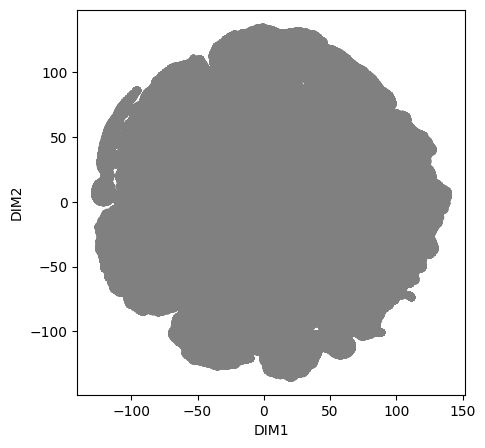

In [ ]:
df_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color='gray')

In [96]:
# La divergence de Kullback-Leibler après optimisation
tsne.kl_divergence_

4.239017963409424

6.2 Projection 3D


In [97]:
tsne = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
df_tsne = tsne.fit_transform(df_scaled)


KeyboardInterrupt



In [ ]:
columns = ['DIM' + str(c) for c in range(1, df_tsne.shape[1]+1, 1)]
df_tsne = pd.DataFrame(df_tsne, index=df.index, columns=columns)
df_tsne.head()

,DIM1,DIM2,DIM3
0,20.735527,0.046167,3.719398
1,9.038375,-8.458485,-10.490098
2,-8.796786,-16.735844,4.971246
3,-27.243227,-6.674284,-7.221925
4,3.490554,-3.855318,-9.224840


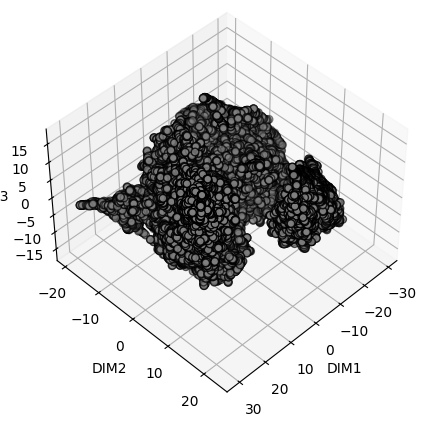

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_tsne['DIM1'], df_tsne['DIM2'], df_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor='grey')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=45, azim=45)

In [ ]:
tsne.kl_divergence_

1.7269021272659302

7. Visualiser les données avec la méthode UMAP

Actuellement, la méthode UMAP (Uniform Manifold Approximation and Projection) n’est pas intégrée dans scikit-learn. Pour l’utiliser il est nécessaire d’installer la librairie umap-learn (voir doc https://umap-learn.readthedocs.io). La commande d’installation avec pip est pip install umap-learn.

In [98]:
import umap
print(umap.__version__)

0.5.7


7.1 Projection 2D

In [99]:
embedding = umap.UMAP(n_components=2, random_state=0, n_jobs=-1)
df_umap = embedding.fit_transform(df_scaled)
columns = ['DIM' + str(c) for c in range(1, df_umap.shape[1]+1, 1)]
df_umap = pd.DataFrame(df_umap, index=df.index, columns=columns)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='DIM1', ylabel='DIM2'>

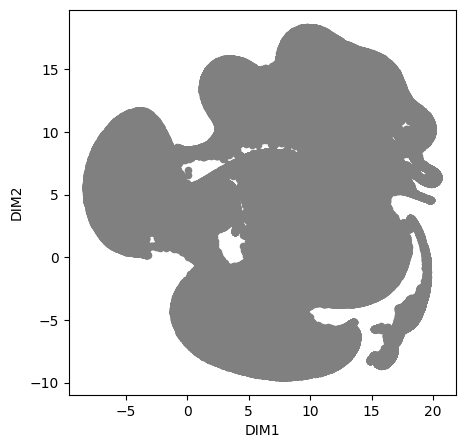

In [100]:
df_umap.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5), color='gray')

7.2 Projection 3D

In [ ]:
embedding = umap.UMAP(n_components=3, random_state=0, n_jobs=-1)
df_umap = embedding.fit_transform(df_scaled)
columns = ['DIM' + str(c) for c in range(1, df_umap.shape[1]+1, 1)]
df_umap = pd.DataFrame(df_umap, index=df.index, columns=columns)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KeyboardInterrupt: 

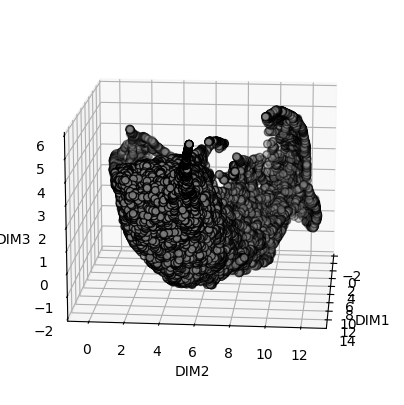

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_umap['DIM1'], df_umap['DIM2'], df_umap['DIM3'], marker='o', s=30, edgecolor='k', facecolor='gray')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=5)